<a href="https://colab.research.google.com/github/rahafbader/T5/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [23]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt



## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [25]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [26]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [27]:
df.isna().sum()
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
147967,False
147968,False
147969,False
147970,False


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [29]:
df['Run_Type'].fillna(df['Run_Type'].mode()[0],inplace=True)
df['Route_Number'].fillna(df['Route_Number'].mode()[0],inplace=True)
df['Reason'].fillna(df['Reason'].mode()[0],inplace=True)
df=df.drop('Boro',axis=1)
df=df.drop('How_Long_Delayed',axis=1)
df=df.drop('Incident_Number',axis=1)
df=df.drop('Busbreakdown_ID',axis=1)
df=df.drop('Informed_On',axis=1)
df=df.drop('Last_Updated_On',axis=1)



mult_featuer=['Reason','Run_Type','Bus_No','Route_Number','Schools_Serviced','Occurred_On','Created_On','Bus_Company_Name','School_Year']
bi_featuer=['Has_Contractor_Notified_Schools','Has_Contractor_Notified_Parents','Have_You_Alerted_OPT','Breakdown_or_Running_Late','School_Age_or_PreK']

L_encode=LabelEncoder()
for i in mult_featuer:
    if df[i].dtype == 'object':
        df[i] = L_encode.fit_transform(df[i])

for i in bi_featuer:
    if df[i].dtype == 'object':
        dummies = pd.get_dummies(df[i], prefix=i)
        df = pd.concat([df, dummies], axis=1)
        df.drop(i, axis=1, inplace=True)

In [30]:
df.isna().sum()
df['School_Year'].value_counts()

,count
School_Year,
1,83141
0,63184
2,1646
3,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 20 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   School_Year                             147972 non-null  int64
 1   Run_Type                                147972 non-null  int64
 2   Bus_No                                  147972 non-null  int64
 3   Route_Number                            147972 non-null  int64
 4   Reason                                  147972 non-null  int64
 5   Schools_Serviced                        147972 non-null  int64
 6   Occurred_On                             147972 non-null  int64
 7   Created_On                              147972 non-null  int64
 8   Bus_Company_Name                        147972 non-null  int64
 9   Number_Of_Students_On_The_Bus           147972 non-null  int64
 10  Has_Contractor_Notified_Schools_No      147972 non-null  bool 
 11  

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [32]:
df=df.drop('Breakdown_or_Running_Late_Breakdown',axis=1)
X=df.drop('Breakdown_or_Running_Late_Running Late',axis=1)
y=df['Breakdown_or_Running_Late_Running Late']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [33]:
model=Sequential()

model.add(Dense(units=32,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [35]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8916 - loss: 0.2961 - val_accuracy: 0.9078 - val_loss: 0.2537
Epoch 2/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9080 - loss: 0.2449 - val_accuracy: 0.9111 - val_loss: 0.2451
Epoch 3/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9117 - loss: 0.2385 - val_accuracy: 0.9108 - val_loss: 0.2410
Epoch 4/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9105 - loss: 0.2368 - val_accuracy: 0.9123 - val_loss: 0.2362
Epoch 5/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9114 - loss: 0.2331 - val_accuracy: 0.9128 - val_loss: 0.2326
Epoch 6/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9122 - loss: 0.2305 - val_accuracy: 0.9132 - val_loss: 0.2322
Epoch 7/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9143 - loss: 0.2276 - val_accuracy: 0.9139 - val_loss: 0.2287
Epoch 8/10
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9168 - loss: 0.2

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [36]:
model.evaluate(X_test, y_test)

1850/1850 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9204 - loss: 0.2084


[0.21144060790538788, 0.9196303486824036]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [37]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1850/1850 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[ 3185  3614]
 [ 1143 51247]]
              precision    recall  f1-score   support

       False       0.74      0.47      0.57      6799
        True       0.93      0.98      0.96     52390

    accuracy                           0.92     59189
   macro avg       0.84      0.72      0.76     59189
weighted avg       0.91      0.92      0.91     59189



## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

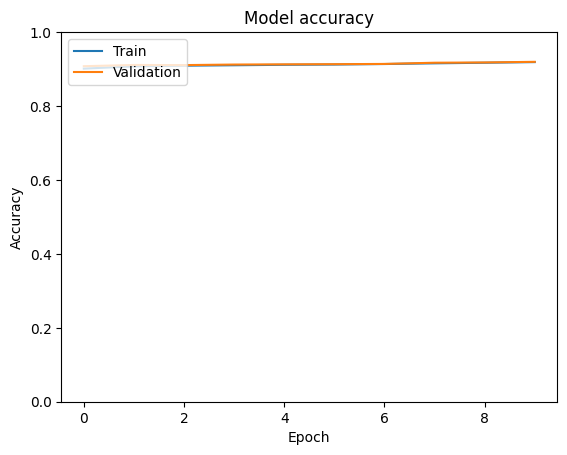

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0, 1])
plt.show()

## Save the Model
Save the trained model for submission.

In [39]:
model.save('ann_exam_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Data Preprocessing:first chick the values null and duplcated and datatype and git overviw to drop or fill
encode the catigrcal featuer if its binary featuer use label encode if multy use one_hot and scale the data for git better resulte



Model Architecture:i start with one lyer without any overfit tachnaqe and the model do well so no need to go complex,use sigmoid for binary

Training Process:for batch size i start random and number of epoch 10 for make the thing simple and its do great for optmizer adam is the bset one to choise


Loss Function and Metrics:use binary_crossentropy becuse the problem is classficatin and metrics accurcy

no  regularization becuse the model do will so no need for complaxty

Model Evaluation: use the plot to show accurcy over epoch and the confusion matrics

no model tunning only No. of epoch and batch size

no overfit or underfit